# Imports

In [201]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [203]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Exploratory Data Analysis

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [205]:
df.describe(include="all")

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

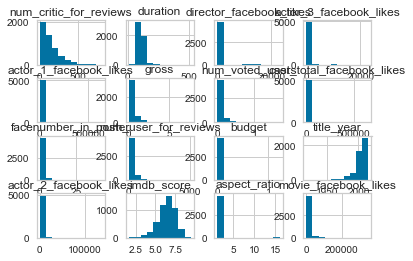

In [206]:
df.hist()

In [207]:
df["imdb_score"].isna().sum()

0

# Preprocess Data

dropping na values for imbd_score

In [208]:
df = df.dropna(subset=["imdb_score"], axis=0)
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
actor_2_name                  0.257783
facenumber_in_poster          0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
imdb_score                    0.000000
movie_title                   0.000000
num_voted_users               0.000000
movie_imdb_link               0.000000
genres                        0.000000
cast_total_facebook_likes

Remove the in-between imdb_score of low and high

In [209]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

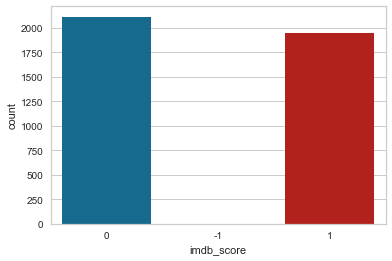

In [210]:
sns.countplot(x="imdb_score", data=df)

array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

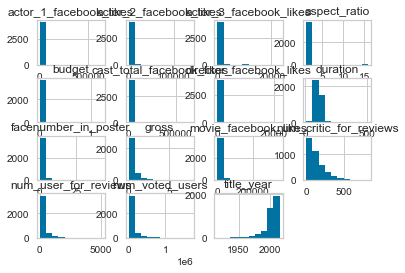

In [211]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X.hist()

In [212]:
y.head()

0    1
1    1
3    1
4    1
6    0
Name: imdb_score, dtype: category
Categories (3, int64): [0 < -1 < 1]

In [213]:
X.skew().sort_values()

title_year                   -2.285178
num_critic_for_reviews        1.586729
duration                      2.340845
gross                         3.263847
num_voted_users               3.898543
num_user_for_reviews          3.947423
facenumber_in_poster          4.800338
movie_facebook_likes          5.038857
director_facebook_likes       5.222487
actor_3_facebook_likes        7.387926
aspect_ratio                  9.063887
actor_2_facebook_likes       11.361543
cast_total_facebook_likes    14.099733
actor_1_facebook_likes       20.399645
budget                       43.822763
dtype: float64

In [214]:
X.isna().sum().sort_values(ascending=False) / len(X) * 100

gross                        19.080403
budget                       10.130317
aspect_ratio                  6.810917
content_rating                6.466683
plot_keywords                 3.319400
title_year                    2.434227
director_facebook_likes       2.335874
director_name                 2.335874
num_critic_for_reviews        1.180231
num_user_for_reviews          0.491763
actor_3_facebook_likes        0.491763
actor_3_name                  0.491763
facenumber_in_poster          0.319646
duration                      0.319646
actor_2_name                  0.295058
actor_2_facebook_likes        0.295058
language                      0.245881
actor_1_name                  0.147529
actor_1_facebook_likes        0.147529
country                       0.098353
genres                        0.000000
movie_facebook_likes          0.000000
movie_imdb_link               0.000000
movie_title                   0.000000
cast_total_facebook_likes     0.000000
num_voted_users          

# Train Test Split

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,content_rating,...,gross,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
4048,691.0,Sarah Gadon,480.0,Douglas Smith,463.0,Caleb Landry Jones,1.85,3200000.0,1962,Not Rated,...,NaN,English,0,http://www.imdb.com/title/tt2099556/?ref_=fn_t...,Antiviral,188.0,47.0,9356,celebrity|injection|near future|scalpel|stabbe...,2012.0
2363,1000.0,Lea Thompson,690.0,Thomas F. Wilson,459.0,J.J. Cohen,1.18,19000000.0,3230,PG,...,210609762.0,English,39000,http://www.imdb.com/title/tt0088763/?ref_=fn_t...,Back to the Future,198.0,809.0,732212,clock tower|delorean|future|time travel|time t...,1985.0
3334,3000.0,Djimon Hounsou,1000.0,Christina Milian,1000.0,Boris Kodjoe,1.85,8500000.0,8097,PG-13,...,21564616.0,English,0,http://www.imdb.com/title/tt1171222/?ref_=fn_t...,Baggage Claim,52.0,41.0,7098,woman wearing only a man's shirt,2013.0
2611,852.0,Oprah Winfrey,581.0,Rae Dawn Chong,271.0,Dana Ivey,1.85,15000000.0,2592,PG-13,...,94175854.0,English,6000,http://www.imdb.com/title/tt0088939/?ref_=fn_t...,The Color Purple,70.0,199.0,60988,book strap|girl|racial discrimination|racial t...,1985.0
1777,11000.0,Harrison Ford,759.0,Sean Young,521.0,M. Emmet Walsh,2.35,28000000.0,13877,R,...,27000000.0,English,34000,http://www.imdb.com/title/tt0083658/?ref_=fn_t...,Blade Runner,302.0,1168.0,461609,artificial intelligence|human android relation...,1982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,40000.0,Johnny Depp,854.0,Tom Berenger,576.0,Kevin Dillon,1.85,6000000.0,42028,R,...,137963328.0,English,9000,http://www.imdb.com/title/tt0091763/?ref_=fn_t...,Platoon,120.0,505.0,291603,1960s|famous score|hero|vietnam|vietnam war,1986.0
2249,11000.0,Adam Sandler,3000.0,Don Cheadle,905.0,John de Lancie,2.35,20000000.0,17050,R,...,19661987.0,English,0,http://www.imdb.com/title/tt0490204/?ref_=fn_t...,Reign Over Me,154.0,231.0,83786,college|depression|grief|mental breakdown|post...,2007.0
3971,507.0,Tom Cullen,236.0,Reece Ritchie,196.0,Marama Corlett,2.35,4000000.0,1281,PG-13,...,143653.0,English,0,http://www.imdb.com/title/tt2403393/?ref_=fn_t...,Desert Dancer,31.0,10.0,1177,dance|dancer|dancing|desert|iran,2014.0
561,2000.0,Dennis Quaid,845.0,Tony Curran,568.0,Miranda Otto,2.35,45000000.0,4397,PG-13,...,21009180.0,English,1000,http://www.imdb.com/title/tt0377062/?ref_=fn_t...,Flight of the Phoenix,114.0,222.0,45815,captain|desert|rescue|stranded|survivor,2004.0


# Fill na values

In [216]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train_mode = X_train.select_dtypes(include='object').mode().iloc[0]
X_train = X_train.fillna(X_train_median)
X_train = X_train.fillna(X_train_mode)
X_test = X_test.fillna(X_train_median)
X_test = X_test.fillna(X_train_mode)
X_train.isna().sum() + X_test.isna().sum()


actor_1_facebook_likes       0
actor_1_name                 0
actor_2_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
actor_3_name                 0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
country                      0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
genres                       0
gross                        0
language                     0
movie_facebook_likes         0
movie_imdb_link              0
movie_title                  0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
plot_keywords                0
title_year                   0
dtype: int64

### Drop features

#### Dropping unnecessary columns such as imdb link, names

In [217]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title"
]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
language                      object
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

Lets take a look at some interesting features

#### Language

In [218]:
value_counts = X_train["language"].value_counts()
value_counts

English       3028
French          51
Spanish         27
Mandarin        19
Hindi           18
German          14
Japanese        13
Russian          8
Italian          8
Korean           7
Cantonese        6
Hebrew           5
Arabic           4
Danish           4
Portuguese       4
Polish           3
Chinese          3
Persian          3
Indonesian       2
Swedish          2
Norwegian        2
Icelandic        2
Dutch            2
Dari             2
None             1
Dzongkha         1
Czech            1
Swahili          1
Bosnian          1
Aboriginal       1
Maya             1
Greek            1
Urdu             1
Telugu           1
Vietnamese       1
Thai             1
Zulu             1
Mongolian        1
Hungarian        1
Kazakh           1
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='count'>

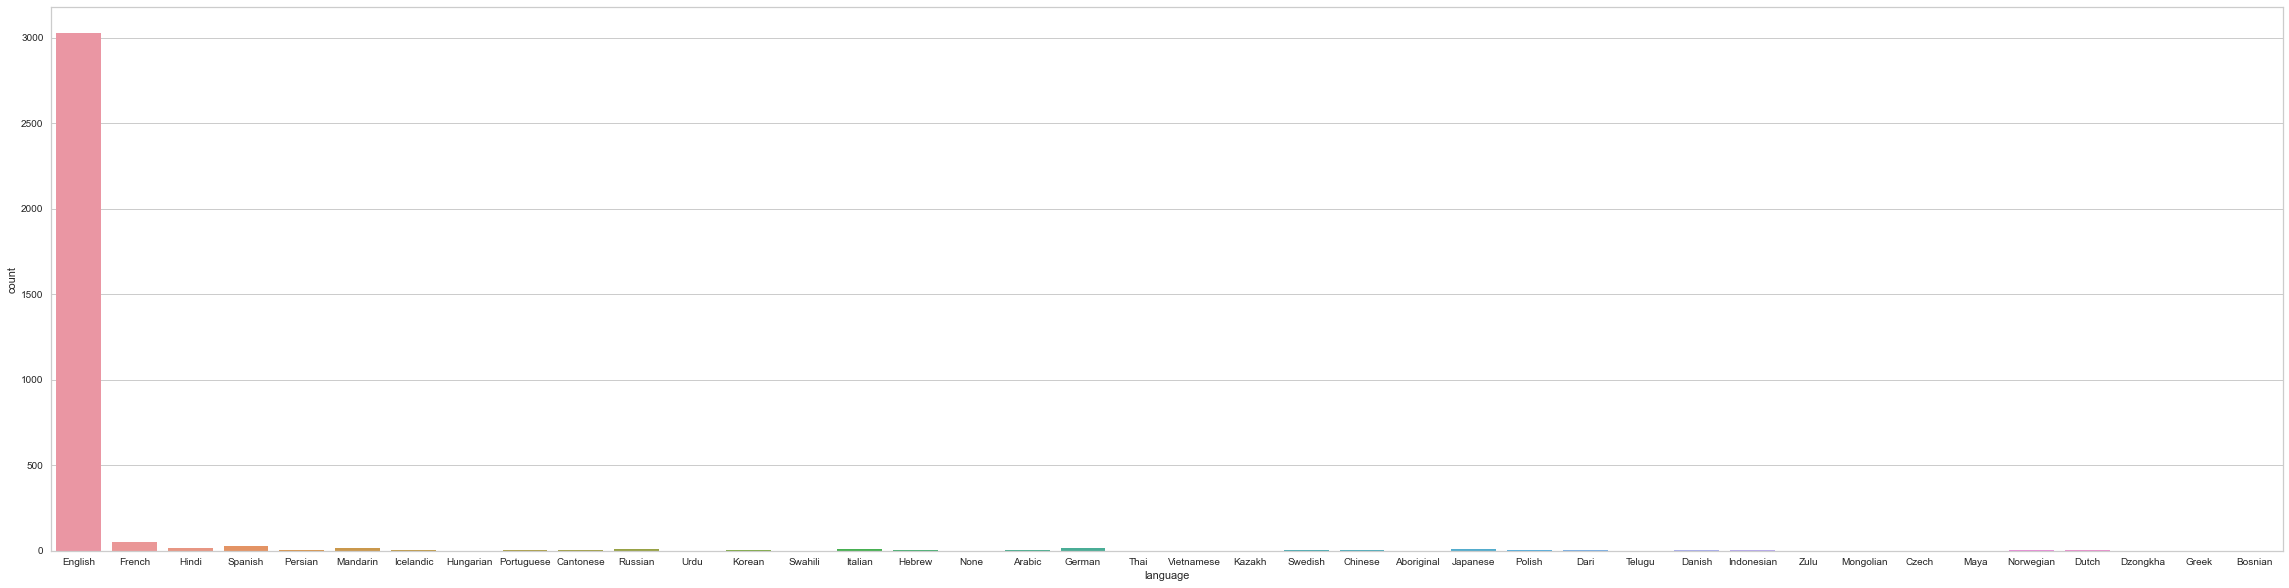

In [219]:
plt.figure(figsize=(40,10))
sns.countplot(x="language", data=X_train)

View columns in percentage

In [220]:
X_train['language'].value_counts(normalize=True) * 100

English       93.083308
French         1.567784
Spanish        0.830003
Mandarin       0.584076
Hindi          0.553335
German         0.430372
Japanese       0.399631
Russian        0.245927
Italian        0.245927
Korean         0.215186
Cantonese      0.184445
Hebrew         0.153704
Arabic         0.122963
Danish         0.122963
Portuguese     0.122963
Polish         0.092223
Chinese        0.092223
Persian        0.092223
Indonesian     0.061482
Swedish        0.061482
Norwegian      0.061482
Icelandic      0.061482
Dutch          0.061482
Dari           0.061482
None           0.030741
Dzongkha       0.030741
Czech          0.030741
Swahili        0.030741
Bosnian        0.030741
Aboriginal     0.030741
Maya           0.030741
Greek          0.030741
Urdu           0.030741
Telugu         0.030741
Vietnamese     0.030741
Thai           0.030741
Zulu           0.030741
Mongolian      0.030741
Hungarian      0.030741
Kazakh         0.030741
Name: language, dtype: float64

English accounts for about 93%, this data is unusable since it's heavily skewed. Dropping this data is the best option

In [221]:
X_train = X_train.drop("language", axis=1)
X_test = X_test.drop("language", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Country

In [222]:
value_counts = X_train["country"].value_counts()
value_counts

USA                   2433
UK                     295
France                 100
Canada                  84
Germany                 66
                      ... 
Georgia                  1
Kyrgyzstan               1
Nigeria                  1
Dominican Republic       1
Greece                   1
Name: country, Length: 62, dtype: int64

View country in percentage

In [223]:
value_counts = X_train["country"].value_counts() / X_train.shape[0] * 100
value_counts

USA                   74.792499
UK                     9.068552
France                 3.074085
Canada                 2.582232
Germany                2.028896
                        ...    
Georgia                0.030741
Kyrgyzstan             0.030741
Nigeria                0.030741
Dominican Republic     0.030741
Greece                 0.030741
Name: country, Length: 62, dtype: float64

<AxesSubplot:xlabel='country', ylabel='count'>

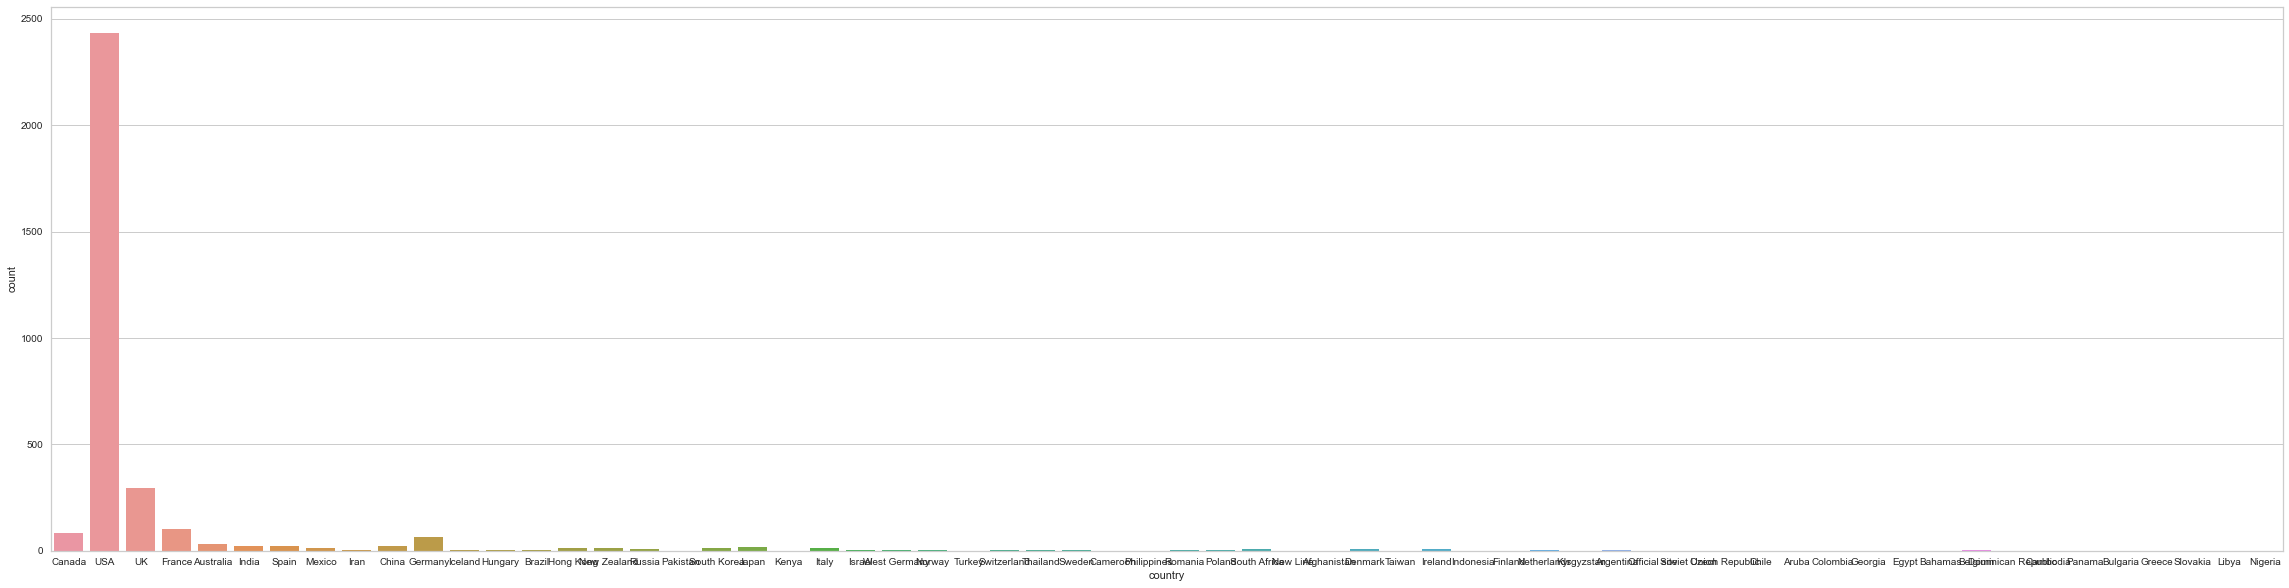

In [224]:
plt.figure(figsize=(40,10))
sns.countplot(x="country", data=X_train)

The 3 dominant countries are USA, UK, and France. Other countries should be recognized as "other" as it's less relevant than the 3

In [225]:
def process_country(X):
  top_three = ["USA","UK","France"]
  X["country"] = X["country"].where(X["country"].isin(top_three), "others")
  return X
X_train = process_country(X_train)
X_test = process_country(X_test)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,country,director_facebook_likes,duration,facenumber_in_poster,genres,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
4048,691.0,480.0,463.0,1.85,3200000.0,1962,Not Rated,others,43.0,108.0,0.0,Horror|Sci-Fi|Thriller,24397469.0,0,188.0,47.0,9356,celebrity|injection|near future|scalpel|stabbe...,2012.0
2363,1000.0,690.0,459.0,1.18,19000000.0,3230,PG,USA,0.0,116.0,0.0,Adventure|Comedy|Sci-Fi,210609762.0,39000,198.0,809.0,732212,clock tower|delorean|future|time travel|time t...,1985.0
3334,3000.0,1000.0,1000.0,1.85,8500000.0,8097,PG-13,USA,68.0,96.0,9.0,Comedy,21564616.0,0,52.0,41.0,7098,woman wearing only a man's shirt,2013.0
2611,852.0,581.0,271.0,1.85,15000000.0,2592,PG-13,USA,14000.0,154.0,0.0,Drama,94175854.0,6000,70.0,199.0,60988,book strap|girl|racial discrimination|racial t...,1985.0
1777,11000.0,759.0,521.0,2.35,28000000.0,13877,R,USA,0.0,117.0,2.0,Sci-Fi|Thriller,27000000.0,34000,302.0,1168.0,461609,artificial intelligence|human android relation...,1982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,40000.0,854.0,576.0,1.85,6000000.0,42028,R,UK,0.0,120.0,0.0,Drama|War,137963328.0,9000,120.0,505.0,291603,1960s|famous score|hero|vietnam|vietnam war,1986.0
2249,11000.0,3000.0,905.0,2.35,20000000.0,17050,R,USA,57.0,124.0,2.0,Drama,19661987.0,0,154.0,231.0,83786,college|depression|grief|mental breakdown|post...,2007.0
3971,507.0,236.0,196.0,2.35,4000000.0,1281,PG-13,UK,10.0,104.0,0.0,Biography|Drama,143653.0,0,31.0,10.0,1177,dance|dancer|dancing|desert|iran,2014.0
561,2000.0,845.0,568.0,2.35,45000000.0,4397,PG-13,USA,212.0,113.0,4.0,Action|Adventure|Drama|Thriller,21009180.0,1000,114.0,222.0,45815,captain|desert|rescue|stranded|survivor,2004.0


#### Genres

In [226]:
plt.figure(figsize=(40,10))
#sns.countplot(x=X_train.genres) 

<Figure size 2880x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

Genres are too complicated and interconnected, dropping this data as for right now

In [227]:
X_train = X_train.drop("genres", axis=1)
X_test = X_test.drop("genres",axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Content Rating

View content rating in percentage

In [228]:
value_counts = X_train["content_rating"].value_counts() / X_train.shape[0] * 100
value_counts

R            46.726099
PG-13        29.203812
PG           14.079311
Not Rated     2.674454
G             2.397787
Unrated       1.229634
Approved      1.106671
TV-14         0.768521
TV-MA         0.553335
TV-PG         0.338149
X             0.245927
TV-G          0.245927
NC-17         0.184445
Passed        0.092223
M             0.061482
TV-Y          0.030741
GP            0.030741
TV-Y7         0.030741
Name: content_rating, dtype: float64

<AxesSubplot:xlabel='content_rating', ylabel='count'>

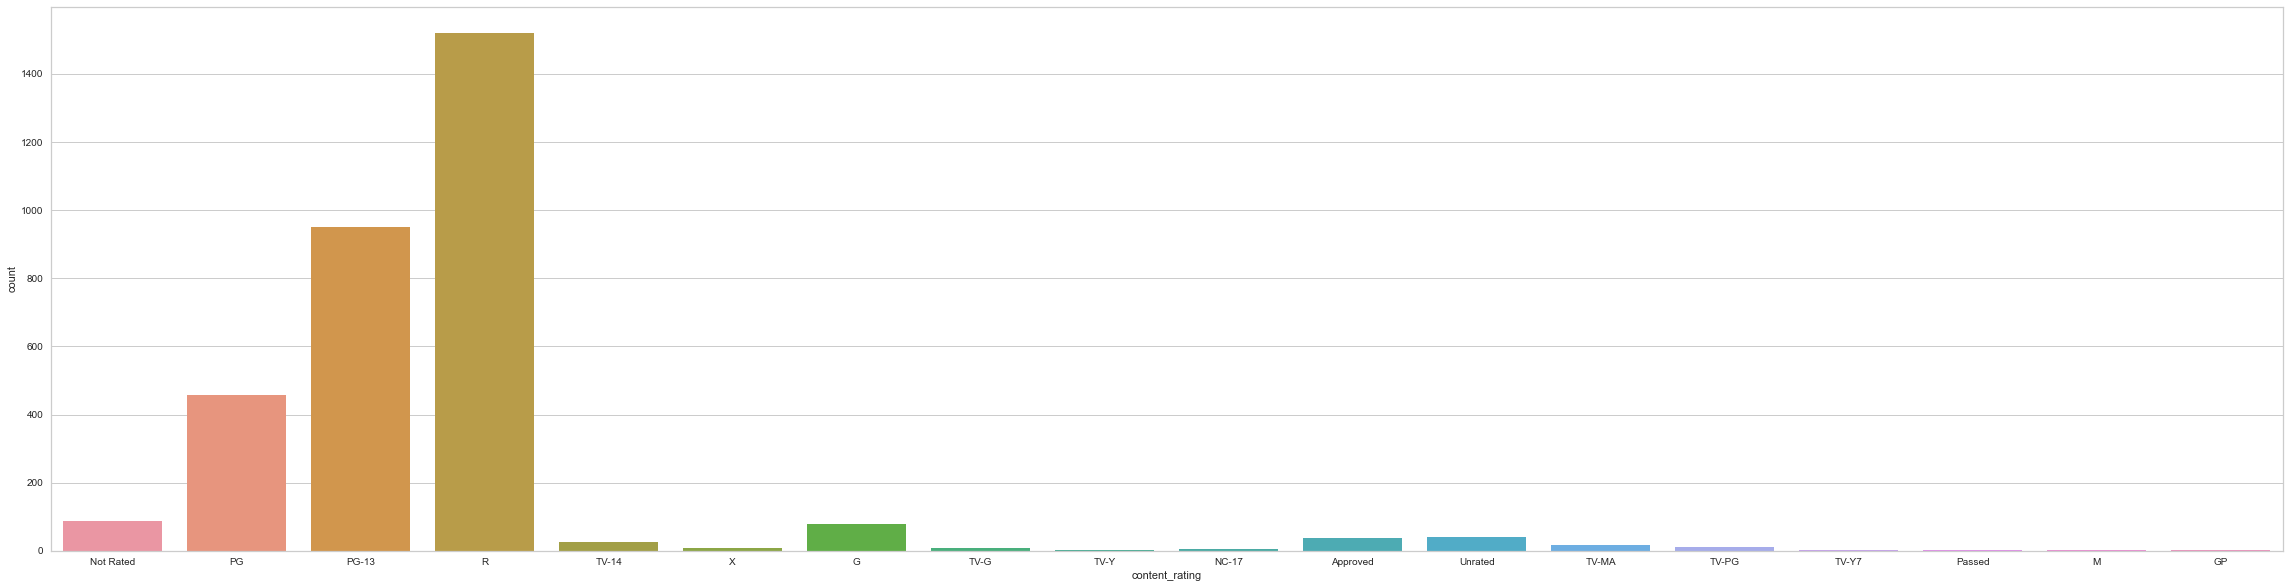

In [229]:
plt.figure(figsize=(40,10))
sns.countplot(x="content_rating", data=X_train)

R, PG, PG-13 are the 3 most dominant values in rating. Group the rest as "others"

In [230]:
def process_content_rating(X):
  top_three = ["R","PG", "PG-13"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X_train = process_content_rating(X_train)
X_test = process_content_rating(X_test)
X_train["content_rating"]

4048    others
2363        PG
3334     PG-13
2611     PG-13
1777         R
         ...  
3582         R
2249         R
3971     PG-13
561      PG-13
1303         R
Name: content_rating, Length: 3253, dtype: object

In [231]:
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Plot keywords

In [232]:
value_counts = X_train["plot_keywords"].value_counts()
value_counts

based on novel                                                                                 115
halloween|masked killer|michael myers|slasher|trick or treat                                     3
assistant|experiment|frankenstein|medical student|scientist                                      3
animal name in title|ape abducts a woman|gorilla|island|king kong                                3
brother sister relationship|group of friends|male nudity|twin|wax                                2
                                                                                              ... 
first lady|framed|investigation|president|secret service                                         1
binge drinking|new york|new york city|september 11 2001|suicide                                  1
car accident|male full back nudity|practicing a suicide|public nudity|suicide contemplation      1
deputy|group of friends|time|train|train crash                                                   1
cult film|

Same as genres, data is too complex and interconnected. Dropping this value

In [233]:
X_train = X_train.drop("plot_keywords", axis=1)
X_test = X_test.drop("plot_keywords", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
title_year                   float64
dtype: object

### Encoding

#### Integer to Float

In [234]:
def int_to_float(X):
    X_copy = X.copy()
    int_cols = X_copy.select_dtypes(include=["int"]).columns
    X_copy[int_cols] = X_copy[int_cols].apply(lambda x: x.astype("float"))
    return X_copy
X_train = int_to_float(X_train)
X_test = int_to_float(X_test)
X_train.dtypes


actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

#### String to One-hot

In [235]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,...,num_voted_users,title_year,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others,country_France,country_UK,country_USA,country_others
4048,691.0,480.0,463.0,1.85,3200000.0,1962.0,43.0,108.0,0.0,24397469.0,...,9356.0,2012.0,0,0,0,1,0,0,0,1
2363,1000.0,690.0,459.0,1.18,19000000.0,3230.0,0.0,116.0,0.0,210609762.0,...,732212.0,1985.0,1,0,0,0,0,0,1,0
3334,3000.0,1000.0,1000.0,1.85,8500000.0,8097.0,68.0,96.0,9.0,21564616.0,...,7098.0,2013.0,0,1,0,0,0,0,1,0
2611,852.0,581.0,271.0,1.85,15000000.0,2592.0,14000.0,154.0,0.0,94175854.0,...,60988.0,1985.0,0,1,0,0,0,0,1,0
1777,11000.0,759.0,521.0,2.35,28000000.0,13877.0,0.0,117.0,2.0,27000000.0,...,461609.0,1982.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,40000.0,854.0,576.0,1.85,6000000.0,42028.0,0.0,120.0,0.0,137963328.0,...,291603.0,1986.0,0,0,1,0,0,1,0,0
2249,11000.0,3000.0,905.0,2.35,20000000.0,17050.0,57.0,124.0,2.0,19661987.0,...,83786.0,2007.0,0,0,1,0,0,0,1,0
3971,507.0,236.0,196.0,2.35,4000000.0,1281.0,10.0,104.0,0.0,143653.0,...,1177.0,2014.0,0,1,0,0,0,1,0,0
561,2000.0,845.0,568.0,2.35,45000000.0,4397.0,212.0,113.0,4.0,21009180.0,...,45815.0,2004.0,0,1,0,0,0,0,1,0


# Model

## Decision Tree Model

In [236]:
dt = DecisionTreeClassifier(criterion="entropy", )
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [237]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,

Classification Report: 
               precision    recall  f1-score   support

         low       0.79      0.75      0.77       407
        high       0.77      0.80      0.78       407

    accuracy                           0.78       814
   macro avg       0.78      0.78      0.78       814
weighted avg       0.78      0.78      0.78       814
 

Accuracy on train:   1.0 

Accuracy on test:  0.778 



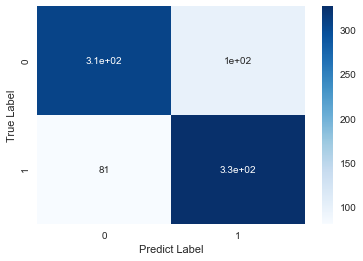

In [239]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=["low","high"]),'\n')
print("Accuracy on train:  ",dt.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",dt.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

[Text(1756.2973461354961, 2127.130434782609, 'num_voted_users <= 146358.0\nentropy = 0.998\nsamples = 3253\nvalue = [1708, 1545]\nclass = 0'),
 Text(1400.2878220419846, 2032.5913043478263, 'duration <= 111.5\nentropy = 0.965\nsamples = 2698\nvalue = [1644, 1054]\nclass = 0'),
 Text(1006.6429150763358, 1938.0521739130436, 'budget <= 19250000.0\nentropy = 0.893\nsamples = 1988\nvalue = [1372, 616]\nclass = 0'),
 Text(625.5270515267175, 1843.513043478261, 'num_voted_users <= 55052.5\nentropy = 0.972\nsamples = 1306\nvalue = [782, 524]\nclass = 0'),
 Text(218.54112595419846, 1748.9739130434784, 'duration <= 65.5\nentropy = 0.93\nsamples = 1129\nvalue = [739, 390]\nclass = 0'),
 Text(27.261068702290075, 1654.4347826086957, 'num_critic_for_reviews <= 5.5\nentropy = 0.528\nsamples = 67\nvalue = [8, 59]\nclass = 1'),
 Text(13.630534351145037, 1559.8956521739133, 'country_USA <= 0.5\nentropy = 0.964\nsamples = 18\nvalue = [7, 11]\nclass = 1'),
 Text(6.815267175572519, 1465.3565217391306, 'entro

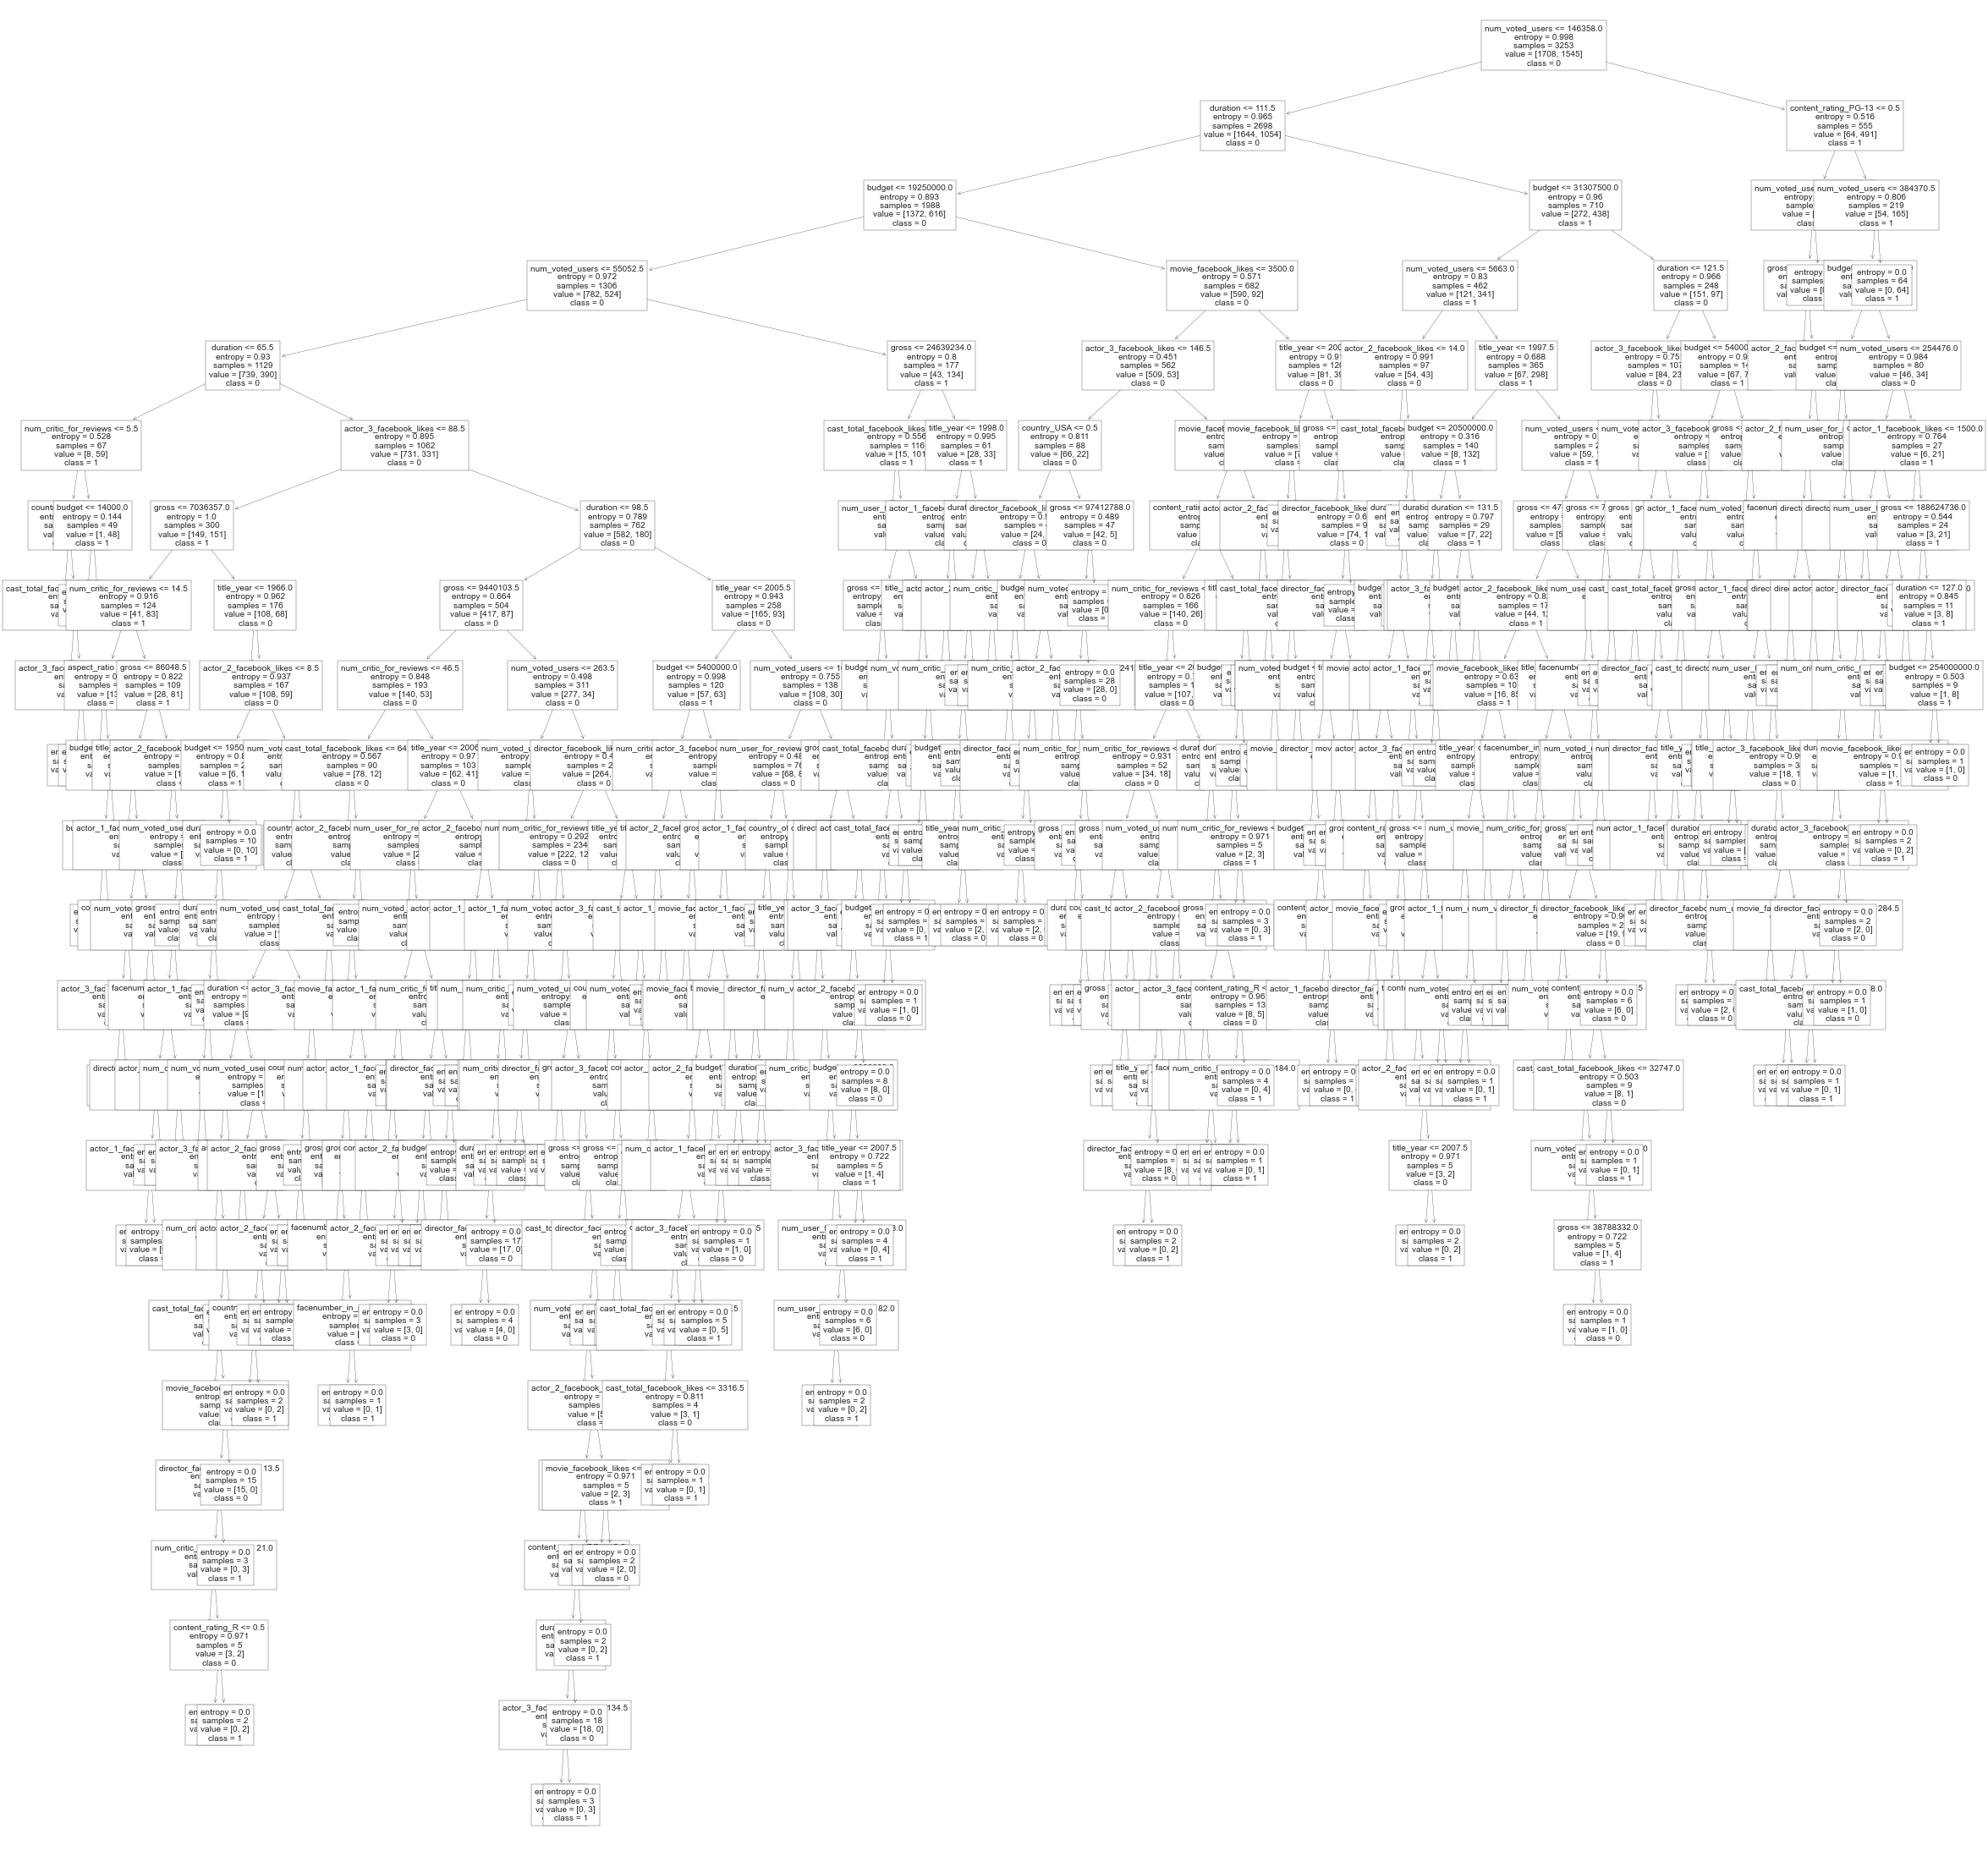

In [250]:
plt.figure(figsize=(40,40))
plot_tree(dt,feature_names=X_train.columns,class_names=dt.classes_.astype(str), fontsize=10)

In [241]:
#dataframe of column name and dt feature importance
pd.DataFrame({"columns":X_train.columns,"importance":dt.feature_importances_}).sort_values("importance",ascending=False)

,columns,importance
13,num_voted_users,0.223858
7,duration,0.123044
4,budget,0.109995
9,gross,0.074344
14,title_year,0.069751
2,actor_3_facebook_likes,0.054594
11,num_critic_for_reviews,0.052150
1,actor_2_facebook_likes,0.050470
6,director_facebook_likes,0.046631
10,movie_facebook_likes,0.039556


In [242]:
metrics.roc_auc_score(y_test,y_pred,average=None)

0.7776412776412776

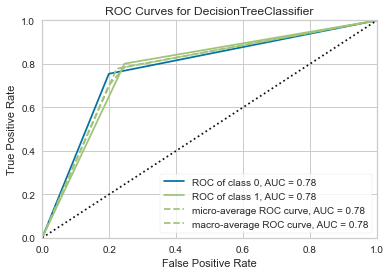

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [243]:
visualizer = ROCAUC(dt, classes=dt.classes_)
visualizer.fit(X_train, y_train)                    # Fit the training data to the visualizer
visualizer.score(X_test, y_test.astype(int))        # Evaluate the model on the test data
visualizer.show()

## Finetuning (GridSearchCV)

In [244]:
dt_gscv=DecisionTreeClassifier()
cv = StratifiedKFold(5)
param_val = [{'criterion':['entropy','gini'],'min_samples_split':np.arange(2,100,2)}]
#grid search configuration
grid = GridSearchCV(dt_gscv, param_val, cv = cv,scoring='roc_auc_ovr')
#fitting into our data
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])}],
             scoring='roc_auc_ovr')

In [245]:
y_pred_gscv=grid.predict(X_test)
y_pred_gscv_prob=grid.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_gscv,multi_class='ovr')

0.7800982800982802

In [246]:
print(grid.best_score_)
print(grid.best_params_)

0.8469611000583358
{'criterion': 'gini', 'min_samples_split': 60}


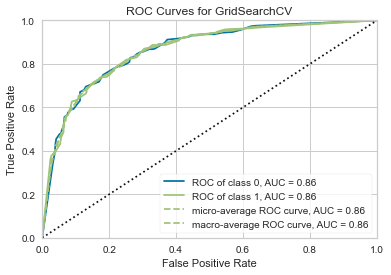

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [247]:
visualizer = ROCAUC(grid, classes=grid.classes_)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test,y_test.astype(int))        # Evaluate the model on the test data
visualizer.show()  

Classification Report: 
               precision    recall  f1-score   support

         low       0.75      0.83      0.79       407
        high       0.81      0.73      0.77       407

    accuracy                           0.78       814
   macro avg       0.78      0.78      0.78       814
weighted avg       0.78      0.78      0.78       814
 

Accuracy on train:   0.937 

Accuracy on test:  0.862 



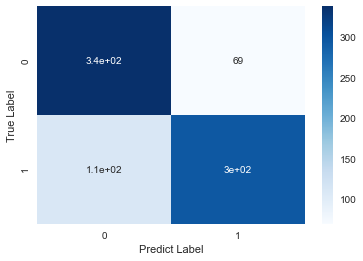

In [248]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_gscv, target_names=["low","high"]),'\n')
print("Accuracy on train:  ",grid.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",grid.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_gscv).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()